Задание 1. Какие слова в этом тексте попали в топ 10 самых частотных?

In [349]:
import nltk
import ssl
nltk.download("punkt", quiet=True)
nltk.download("stopwords", quiet=True)
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pymystem3==0.1.10
from pymystem3 import Mystem
mystem = Mystem() 

In [351]:
with open ('Chukovsky.txt') as file:
  text = file.read() 

In [352]:
ms_analyzed = mystem.analyze(text)

In [353]:
lemms = [elem['analysis'][0]['lex'] for elem in ms_analyzed if elem.get('analysis')]

In [354]:
lemms_1 = []
for i in lemms:
  if i == 'бармаль' or i == 'бармалея':
    i = 'бармалей'
  if i not in russian_stopwords:
    lemms_1.append(i)


In [355]:
set_lemms = set(lemms_1)

In [356]:
dict_text={}
for i in set_lemms:
  if i not in russian_stopwords:
    dict_text[i] = lemms_1.count(i)


In [ ]:
! pip3 install pandas

In [357]:
import pandas as pd

In [358]:
dataset = pd.DataFrame.from_dict(dict_text, orient="index",columns=["num"])

In [359]:
itog=dataset.sort_values(by='num', ascending=False)

In [360]:
itog.head(10)

,num
бармалей,27
африка,26
ребенок,18
добрый,11
акула,9
крокодил,9
милый,7
маленький,7
любить,6
айболит,6


In [361]:
itog.head(18)

,num
бармалей,27
африка,26
ребенок,18
добрый,11
акула,9
крокодил,9
милый,7
маленький,7
любить,6
айболит,6


Задание 3. Определить, какое слово (лемма) в приведенном  фрагменте более тематично.

In [362]:
frag = ('Но папочка и мамочка уснули вечерком,А Танечка и Ванечка — в Африку бегом, —В Африку!В Африку! ') 

In [363]:
ms_analyzed_frag = mystem.analyze(frag)

In [364]:
lemms_ms_analyzed_frag_0 = [elem['analysis'][0]['lex'] for elem in ms_analyzed_frag if elem.get('analysis')]

In [365]:
lemms_ms_analyzed_frag = []

In [366]:
for i in lemms_ms_analyzed_frag_0:
  if i not in russian_stopwords:
    lemms_ms_analyzed_frag.append(i)

In [367]:
set_lemms_frag = set(lemms_ms_analyzed_frag)

In [368]:
dict_text_frag={}
for i in set_lemms_frag:
  if i not in russian_stopwords:
    dict_text_frag[i] = lemms_ms_analyzed_frag.count(i)

In [369]:
len_text = len(lemms_1)

In [370]:
len_frag = len(lemms_ms_analyzed_frag)

In [371]:
dict_tema={}
for i in set_lemms_frag:
  if i not in russian_stopwords:
    dict_tema[i] = (lemms_ms_analyzed_frag.count(i) / len_frag)*(len_text/lemms_1.count(i))


In [372]:
dict_tema

{'африка': 5.169230769230769,
 'бегом': 44.800000000000004,
 'ванечка': 22.400000000000002,
 'вечерок': 44.800000000000004,
 'мамочка': 14.933333333333335,
 'папочка': 14.933333333333335,
 'танечка': 22.400000000000002,
 'уснуть': 44.800000000000004}

Задание 2. Глагольная форма, наиболее характерная для первого фрагмента текста

In [374]:
lemms_gr = [elem['analysis'][0]['gr'] for elem in ms_analyzed if elem.get('analysis')]

In [375]:
lemms_gr_2=[]
for i in lemms_gr:
  if i[0] == 'V':
    lemms_gr_2.append(i)


In [376]:
frag_gr = 'Маленькие дети!Ни за что на светеНе ходите в Африку,В Африку гулять!В Африке акулы,В Африке гориллы,В Африке большие Злые крокодилы Будут вас кусать,Бить и обижать,-Не ходите, дети,В Африку гулять.'

In [377]:
frag_gr_ms_analyzed = mystem.analyze(frag_gr)

In [378]:
lemms_frag_gr = [elem['analysis'][0]['gr'] for elem in frag_gr_ms_analyzed if elem.get('analysis')]

In [379]:
lemms_frag_gr_2=[]
for i in lemms_frag_gr:
  if i[0] == 'V':
    lemms_frag_gr_2.append(i)

In [380]:
len_gr = len(lemms_gr_2)
len_frag_gr = len(lemms_frag_gr_2)

In [382]:
dict_gr={}
for i in lemms_frag_gr_2:
  dict_gr[i] = (lemms_frag_gr_2.count(i) / len_frag_gr)*(len_gr/lemms_gr_2.count(i))

In [383]:
dict_gr

{'V,несов,нп=(непрош,мн,изъяв,2-л|мн,пов,2-л)': 11.916666666666666,
 'V,несов,нп=инф': 8.9375,
 'V,несов,пе=инф': 17.875,
 'V,нп=непрош,мн,изъяв,3-л': 5.958333333333333,
 'V=инф,несов,пе': 5.958333333333333}

In [ ]:
Задание 4. Наиболее частотная цепочка из двух частей речи.

In [385]:
import re

In [386]:
parts_of_speech=[]

In [ ]:
for i in lemms_gr:
  x = re.search("[A-Z]*",i)
  parts_of_speech.append(x.group(0))


In [389]:
i=0
itog={}
while i <= (len(parts_of_speech)-2):
  comb = tuple([parts_of_speech[i], parts_of_speech[i+1]])
  if comb in itog:
    itog[comb] = itog[comb]+1
  else:
    itog[comb]=1
  i+=1


In [390]:
max_val = max(itog.values())
for i in itog:
  if itog[i]==max_val:
    print(i)

('S', 'V')


Задание 5. Синтаксические деревья

In [ ]:
! pip3 install ufal.udpipe

     |████████████████████████████████| 304 kB 23.3 MB/s 
  Created wheel for ufal.udpipe: filename=ufal.udpipe-1.2.0.3-cp37-cp37m-linux_x86_64.whl size=5626691 sha256=abc59178ee5921dea943fd6be81b2a2e615ff776faba7a02bc4f6963a9964017
  Stored in directory: /root/.cache/pip/wheels/b8/b5/8e/3da091629a21ce2d10bf90759d0cb034ba10a5cf7a01e83d64
Successfully built ufal.udpipe


In [ ]:
from ufal.udpipe import Model, Pipeline

In [ ]:
UDPIPE_MODEL_FN = "model_ru.udpipe"
!wget -O {UDPIPE_MODEL_FN} https://github.com/jwijffels/udpipe.models.ud.2.0/blob/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe?raw=true

In [ ]:
model = Model.load(UDPIPE_MODEL_FN) # загружаем модель, сохраняем в переменную model
model

<Swig Object of type 'model *' at 0x7fef5b6e30f0>

In [ ]:
sent_1 = "В Африке акулы,В Африке гориллы,В Африке большие Злые крокодилы"

In [ ]:
pipeline = Pipeline(model, 'generic_tokenizer', '','','')

In [340]:
parsed = pipeline.process(sent_1)

In [ ]:
! pip3 install graphviz
! pip3 install pydot

In [ ]:
from nltk import DependencyGraph, Tree 

In [ ]:
def conllu_to_list(parser_result): 
    sents = []
    for sent in parser_result.split('\n\n'):
        sent = '\n'.join([line for line in sent.split('\n') if not line.startswith('#')])
        sent = sent.replace('\troot\t', '\tROOT\t')
        sents.append(sent)
    return sents

In [ ]:
ud = conllu_to_list(parsed)

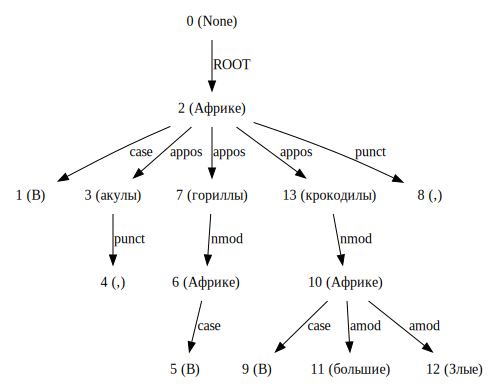

In [333]:
ud_graph = DependencyGraph(tree_str=ud[0])
ud_graph

In [334]:
sent_2 = "В Африке акулы,В Африке гориллы,В Африке большие Злые крокодилы Будут вас кусать,Бить и обижать,-Не ходите, дети,В Африку гулять."

In [337]:
pipeline = Pipeline(model, 'generic_tokenizer', '','','')

In [345]:
parsed_2 = pipeline.process(sent_2)

In [346]:
ud_2 = conllu_to_list(parsed_2)

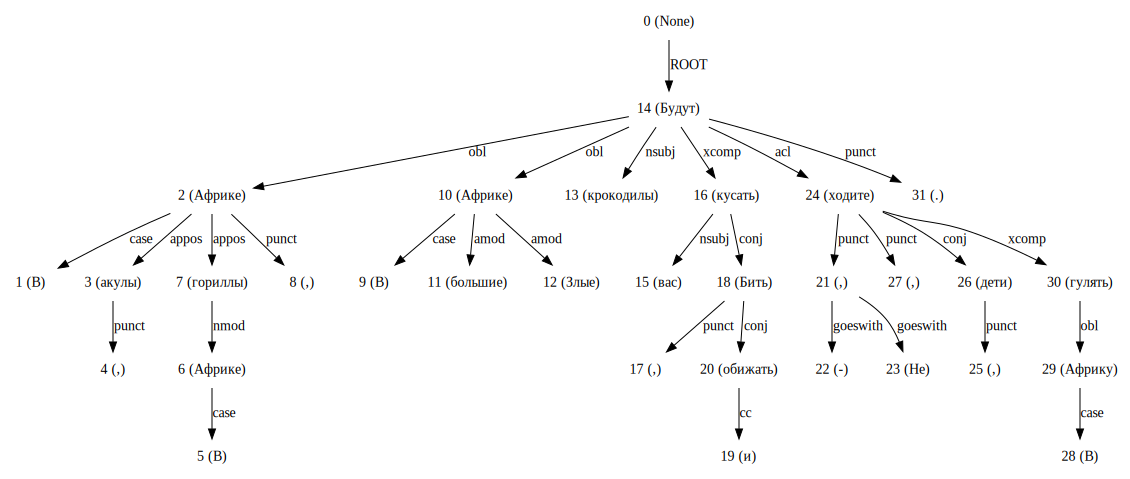

In [347]:
ud_graph_2 = DependencyGraph(tree_str=ud_2[0])
ud_graph_2